In [1]:
# imports required.
import os
import numpy as np
import pickle
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
# read and print the files in the data directory.
def readFiles():
    files = os.listdir("./data")
    print("Data files are:", files)
    return files

In [3]:
# this method loads data in each file, and normalizes all values by dividing it by 255 (all in decimal now), 
# we are taking only the first 11111 records for each image object and putting the x of all images into one array.
# the y takes values 0, 1, 2 and so on.
def readModifyData(files):
    counter = 0
    x = []
    y = []
    for file in files:
        file = "./data/" + file
        xFile = np.load(file).astype('float32') / 255
        xFile = xFile[0:11111]
        x.append(xFile)
        yFile = [counter] * 11111
        yFile = np.array(yFile).astype('float32')
        yFile = yFile.reshape(yFile.shape[0], 1)
        y.append(yFile)
        counter += 1
        
    return x, y

# file = "./data/full_numpy_bitmap_ant.npy"
# x = np.load(file)
# x = x[0:1, :]
# print(x)
# x = x.astype('float32') / 255
# print(x)

In [4]:
# method to randomly show one object from each class.
def viewImages(x, y):
    objects = ['ant','clock','eye','banana','door']
    randomEntries = [10000, 20000, 30000, 40000, 50000]
    for item in randomEntries:
        print("Class:", y[item])
        plt.title(objects[int(y[item])])
        plt.imshow(x[item].reshape(28,28), plt.get_cmap('Greys'))
        plt.show()

In [5]:
# method to process x, y into 2D array of all rows of all objects and shuffle them up.
def processXY(x, y):    
    x = np.array(x).astype('float32')
    y = np.array(y).astype('float32')
    print(x.shape)
    print(y.shape)
    
    x = x.reshape(x.shape[0] * x.shape[1], x.shape[2])
    y = y.reshape(y.shape[0] * y.shape[1], y.shape[2])
    print(x.shape)
    print(y.shape)
    
    viewImages(x, y)
    x, y = shuffle(x, y)
    return x, y

In [6]:
# pickle is the process of converting a Python object into a byte stream to store it in a file. Here we are opening 
# the file x and y in write bytes mode. 
def pickleXY(x, y):
    with open("x", "wb") as f:
        pickle.dump(x, f, protocol=4)
    with open("y", "wb") as f:
        pickle.dump(y, f, protocol=4)

In [7]:
# main method to call other methods.
def main():
    files = readFiles()
    x, y =  readModifyData(files)
    x, y = processXY(x, y)
    pickleXY(x, y)

Data files are: ['full_numpy_bitmap_ant.npy', 'full_numpy_bitmap_clock.npy', 'full_numpy_bitmap_eye.npy', 'full_numpy_bitmap_banana.npy', 'full_numpy_bitmap_door.npy']
(5, 11111, 784)
(5, 11111, 1)
(55555, 784)
(55555, 1)
Class: [0.]


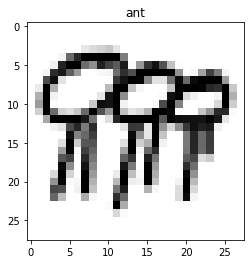

Class: [1.]


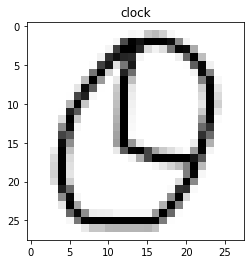

Class: [2.]


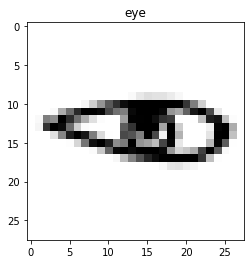

Class: [3.]


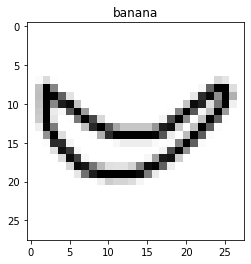

Class: [4.]


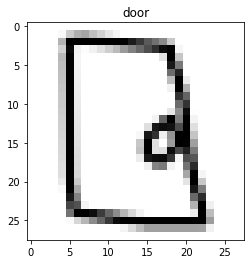

In [8]:
main()